In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/home/k8user/Akhil_HateSpeech/Dataset/labeled_data.csv")

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head(3)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [6]:
df.columns

Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')

In [7]:
df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
df.groupby("class").describe()

count                                              hate_speech  \
         count      mean       std  min  25%  50%  75%  max       count   
class                                                                     
0       1430.0  3.108392  0.648084  3.0  3.0  3.0  3.0  9.0      1430.0   
1      19190.0  3.268890  0.923024  3.0  3.0  3.0  3.0  9.0     19190.0   
2       4163.0  3.172712  0.746097  3.0  3.0  3.0  3.0  9.0      4163.0   

                 ... offensive_language       neither                      \
           mean  ...                75%  max    count      mean       std   
class            ...                                                        
0      2.256643  ...                1.0  4.0   1430.0  0.095804  0.326007   
1      0.180459  ...                3.0  9.0  19190.0  0.084888  0.284093   
2      0.062935  ...                1.0  4.0   4163.0  2.845544  0.795181   

                                
       min  25%  50%  75%  max  
class                           
0      0.0  0.0  0.0  0.0  4.0  
1      0.0  0.0  0.0  0.0  3.0  
2      2.0  2.0  3.0  3.0  9.0  

[3 rows x 32 columns]

In [9]:
#df.groupby("class").describe()["class"==0]
sum(df["class"]==0)

1430

In [10]:
df["class"].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [11]:
def percentage_class(idx):
    Percentage = 100 * float(sum(df["class"]==idx))/float(len(df["class"]))
    return Percentage


In [12]:
print("the percenatge of '0' class", percentage_class(0))
print("the percenatge of '1' class", percentage_class(1))
print("the percenatge of '2' class", percentage_class(2))

the percenatge of '0' class 5.770084332001775
the percenatge of '1' class 77.43211072105879
the percenatge of '2' class 16.797804946939433


<AxesSubplot:ylabel='class'>

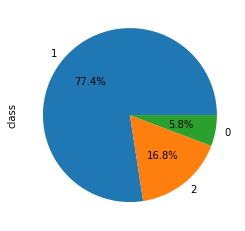

In [13]:
#ploting percentage of each class
df["class"].value_counts().plot(kind='pie',autopct='%1.1f%%')

Finding out the Maximum length tweet



In [14]:
df['length'] = df['tweet'].apply(len)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


<AxesSubplot:ylabel='Frequency'>

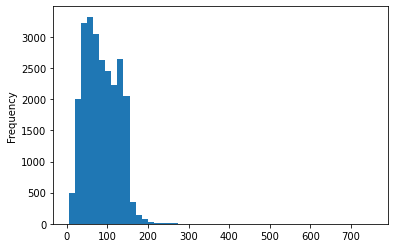

In [15]:
df['length'].plot(bins=50, kind='hist')

#Feature generation

Here copying the data from **df** to **dataF** and creating new variable with same data

In [16]:
#copying data from original variable to another varible.

dataF = df.copy()

In [23]:
#Viewing top 3 rows in the data set

dataF.head(3)

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120


In [24]:
dataF.head(5)

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


In [25]:
# Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords            ## it will check stop words present in data
from nltk.stem.porter import PorterStemmer   ## it will use for stemmming the words
from nltk.stem import WordNetLemmatizer
from nltk.tag import StanfordPOSTagger

In [26]:
# !pip install contractions

In [27]:
import contractions
def con(words):
    return [contractions.fix(word) for word in words.split()]    #For expanding Contractions

In [28]:
# dataF['Contractions']=dataF['tweet'].apply(lambda x: con(x))

In [29]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


In [30]:
#!pip install TextBlob
#from textblob import TextBlob

In [31]:
#!pip install gingerit

In [32]:
#from gingerit.gingerit import GingerIt
#parser = GingerIt()
#tweet=parser.parse(dataF['tweet'][23])
#tweet

In [33]:
#blob=TextBlob(dataF['tweet'][23])
#blob.correct()

In [34]:
# Expanding whatsapp language slangs

import csv
import re

def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "/home/k8user/Akhil_HateSpeech/Preprocessing/sms_slang_translator/slang.txt"
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if str(_str).upper() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    return ' '.join(user_string)

In [35]:
dataF['ExpandedSlangs']=dataF['tweet'].apply(lambda x: translator(x)) 

In [36]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [37]:
dataF['Preprocessed_Initial']=dataF['ExpandedSlangs'].apply(lambda x: con(x)) #Contractions for expanded slangs

In [38]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s..."
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi..."


In [39]:
# import nltk
# nltk.download('stopwords')

In [40]:
# import nltk
# nltk.download('wordnet')

In [41]:
# import nltk
# nltk.download('punkt')

In [42]:
# Preprocessing the tweets.

import nltk
from nltk.tokenize import RegexpTokenizer,word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
 
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    #for text in sentence:
    #  if text in ['html','www','http','https','rt']:
    #sentence= [sentence.replace(w,'') for w in sentence if w in ['html','www','http','https','rt']]
    sentence=sentence.replace('rt',"")
    sentence=sentence.replace('www',"")
    sentence=sentence.replace('http',"")
    sentence=sentence.replace('https',"")
    sentence=sentence.replace('html',"")
    sentence=sentence.replace('*',"")
    sentence=sentence.replace('#',"")
    cleanr = re.compile('<.?>')
    cleantext1 = re.sub(cleanr, '', sentence)
    cleantext = re.sub('@[^\s]+','',cleantext1)
#     rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', cleantext)
    tokenizer = RegexpTokenizer(r'\w+')
    #tokenizer = RegexpTokenizer("[\w']+")
    tokens = tokenizer.tokenize(rem_num)
    #tokens = word_tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2] # if not w in stopwords.words('english')]
    #stem_words=[stemmer.stem(w) for w in filtered_words]
    #lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)

In [43]:
dataF['PreprocessedTweet']=dataF['Preprocessed_Initial'].map(lambda s:preprocess(s))
#dataF['tweet_prepro'] = dataF['tweet'].apply(lambda x: preprocess(x))
#dataF['tweet_prepro'].tail()

In [44]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",woman you should not complain about cleaning y...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty...",boy that cold tyga down bad for cuffin that ho...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab...",dog you ever fuck bitch and she sta cry you co...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",she look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",the shit you hear about might true might faker...


In [45]:
def tokenize(text):
    tokens = re.split(" ",text) 
    return tokens

In [46]:
dataF['final_tweet_tokens'] = dataF['PreprocessedTweet'].apply(lambda x: tokenize(x))

In [47]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet,final_tweet_tokens
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",woman you should not complain about cleaning y...,"[woman, you, should, not, complain, about, cle..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty...",boy that cold tyga down bad for cuffin that ho...,"[boy, that, cold, tyga, down, bad, for, cuffin..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab...",dog you ever fuck bitch and she sta cry you co...,"[dog, you, ever, fuck, bitch, and, she, sta, c..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",she look like tranny,"[she, look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",the shit you hear about might true might faker...,"[the, shit, you, hear, about, might, true, mig..."


In [48]:
dataF['PreprocessedTweet'].head()

0    woman you should not complain about cleaning y...
1    boy that cold tyga down bad for cuffin that ho...
2    dog you ever fuck bitch and she sta cry you co...
3                                 she look like tranny
4    the shit you hear about might true might faker...
Name: PreprocessedTweet, dtype: object

In [49]:
# !pip install wordcloud

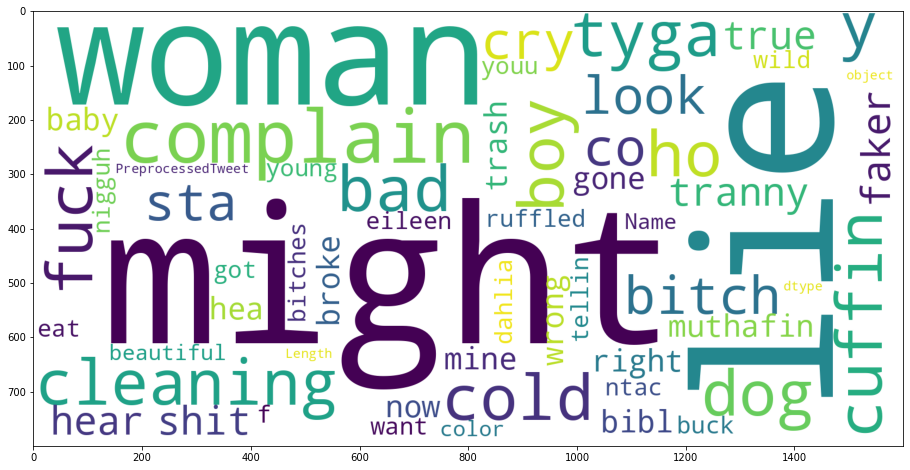

In [50]:
from wordcloud import WordCloud
word_c = WordCloud(collocations=False,background_color='white',mode='RGB',scale=4).generate(str(dataF['PreprocessedTweet']))
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,8),facecolor='w')
plt.imshow(word_c);

In [51]:
def lemmatizing(words):
    lemmatizer =WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

In [52]:
dataF['LemmaWords']=dataF['final_tweet_tokens'].apply(lambda x: lemmatizing(x))

In [53]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet,final_tweet_tokens,LemmaWords
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",woman you should not complain about cleaning y...,"[woman, you, should, not, complain, about, cle...","[woman, you, should, not, complain, about, cle..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty...",boy that cold tyga down bad for cuffin that ho...,"[boy, that, cold, tyga, down, bad, for, cuffin...","[boy, that, cold, tyga, down, bad, for, cuffin..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab...",dog you ever fuck bitch and she sta cry you co...,"[dog, you, ever, fuck, bitch, and, she, sta, c...","[dog, you, ever, fuck, bitch, and, she, sta, c..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",she look like tranny,"[she, look, like, tranny]","[she, look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",the shit you hear about might true might faker...,"[the, shit, you, hear, about, might, true, mig...","[the, shit, you, hear, about, might, true, mig..."


In [54]:
dataF['LemmaWords']

0        [woman, you, should, not, complain, about, cle...
1        [boy, that, cold, tyga, down, bad, for, cuffin...
2        [dog, you, ever, fuck, bitch, and, she, sta, c...
3                                [she, look, like, tranny]
4        [the, shit, you, hear, about, might, true, mig...
                               ...                        
24778    [you, muthafin, lie, right, his, trash, now, m...
24779    [you, have, gone, and, broke, the, wrong, hea,...
24780    [young, buck, want, eat, that, nigguh, like, a...
24781           [youu, got, wild, bitch, tellin, you, lie]
24782    [ruffled, ntac, eileen, dahlia, beautiful, col...
Name: LemmaWords, Length: 24783, dtype: object

In [55]:
# dataF.to_csv('Hate_spech_preprocessed.csv', index=False)

In [56]:
# !pip install keras

In [57]:
# !pip install tensorflow

In [58]:
# from keras.preprocessing.text import text_to_word_sequence

In [59]:
# dataF['KerasTokens']=dataF['PreprocessedTweet'].apply(text_to_word_sequence)

In [60]:
# dataF.head()

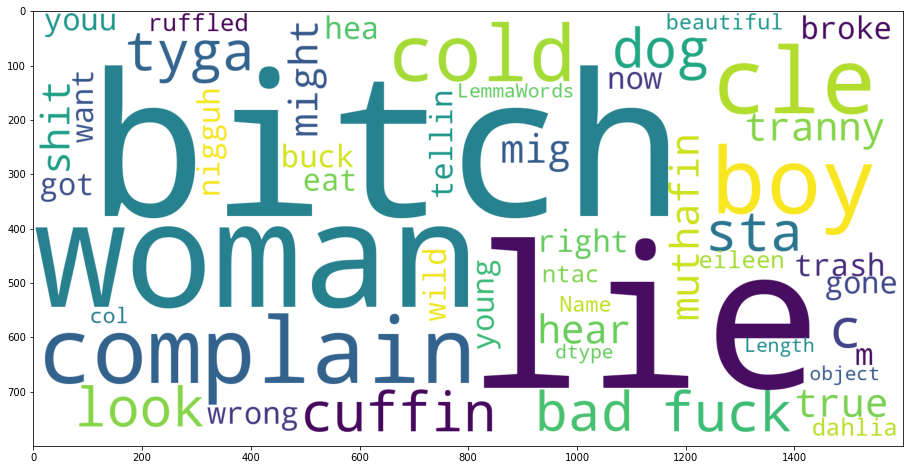

In [61]:
from wordcloud import WordCloud
word_c = WordCloud(collocations=False,background_color='white',mode='RGB',scale=4).generate(str(dataF['LemmaWords']))
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,8),facecolor='w')
plt.imshow(word_c);

In [62]:
dataF['Lemma_Preprocessed']=dataF['LemmaWords'].map(lambda s:preprocess(s))

In [63]:
from sklearn.feature_extraction.text import CountVectorizer 

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [64]:
common_words = get_top_n_words(dataF['Lemma_Preprocessed'], 250)
top_words=[]
for word, freq in common_words:
    print(word, freq)
    top_words.append(word)

bitch 11466
you 9282
the 7340
not 5041
that 4492
hoe 4347
and 3993
are 3063
like 2837
pussy 2265
all 2186
this 2165
for 2131
out 2054
nigga 2020
with 1854
got 1602
fuck 1575
get 1545
your 1544
they 1499
but 1489
just 1471
about 1406
she 1371
have 1337
when 1332
these 1323
shit 1300
trash 1165
her 1154
what 1085
laughing 1007
want 1002
loud 1000
will 964
amp 930
them 917
some 902
know 861
off 818
can 817
one 762
love 755
who 729
how 717
girl 701
cannot 675
would 641
fucking 631
because 625
bird 608
make 601
now 596
look 588
say 578
why 577
from 575
going 574
bad 573
man 568
then 554
faggot 545
his 543
good 538
need 533
too 522
think 499
time 496
hate 487
see 480
still 479
back 477
only 461
day 458
let 452
never 447
people 427
really 426
did 424
there 418
real 417
right 403
even 391
white 390
being 388
said 381
here 378
laugh 378
come 375
more 368
over 362
had 361
dick 360
call 357
their 351
head 348
wit 346
down 345
been 343
life 342
than 341
tell 340
stop 336
talk 331
take 328
damn 327

In [65]:
most_common = pd.DataFrame(common_words,columns=['words', 'count'])
most_common.head()

,words,count
0,bitch,11466
1,you,9282
2,the,7340
3,not,5041
4,that,4492


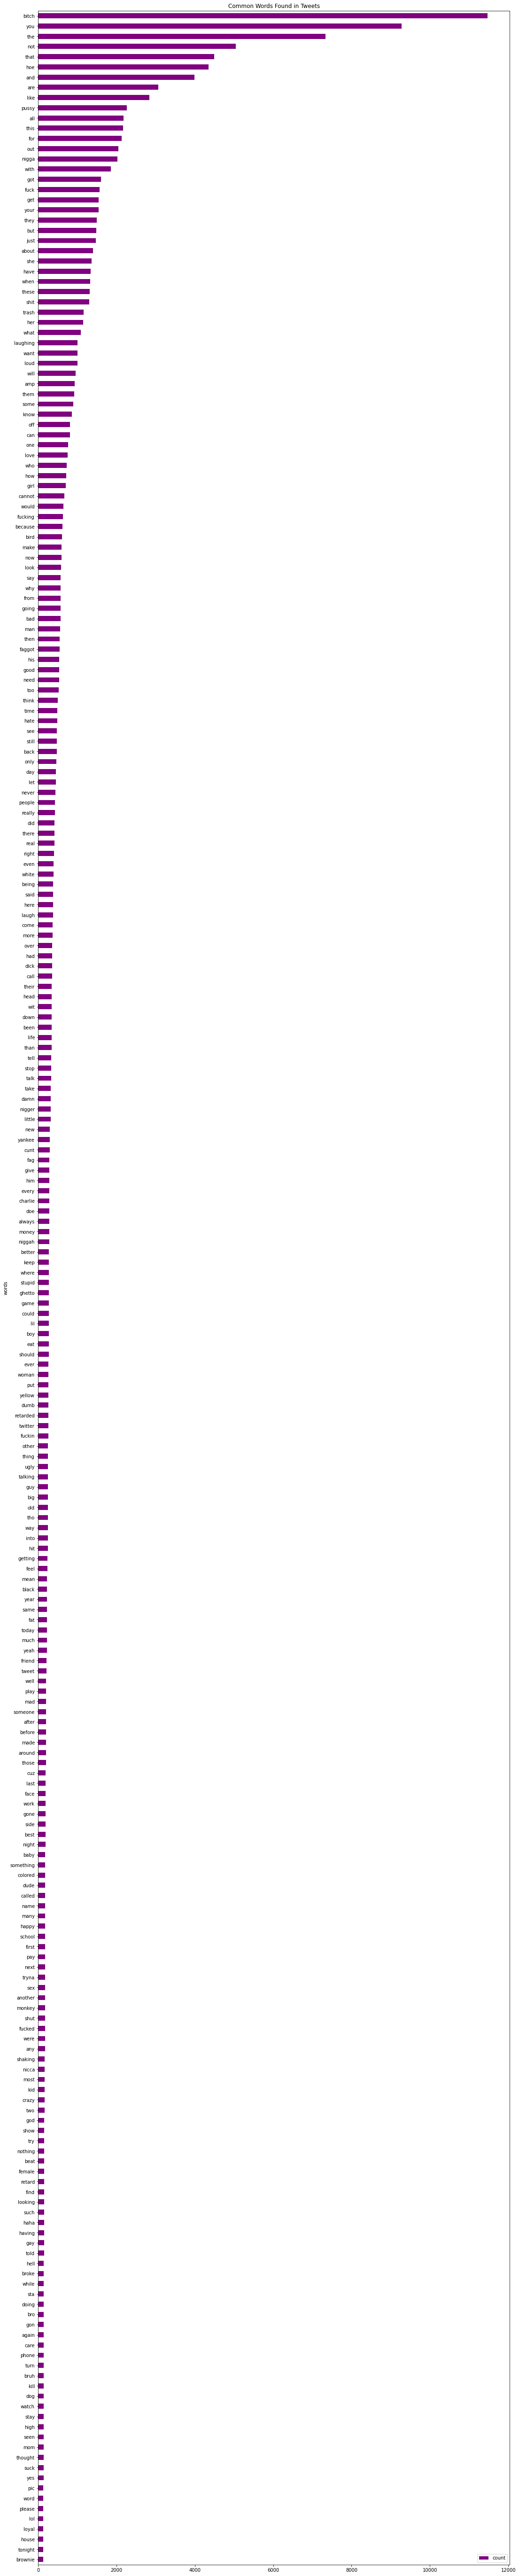

In [66]:
fig, ax = plt.subplots(figsize=(18, 100))

# Plot horizontal bar graph
most_common.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets")

plt.show()

# TF-IDF

In [67]:
# !pip install gensim

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [69]:
tfidf_vectorizer = TfidfVectorizer(min_df=50, max_features=1000, stop_words=None,tokenizer=tokenize,analyzer='word')
tfidf = tfidf_vectorizer.fit_transform(dataF['PreprocessedTweet'])
tfidf.shape

(24783, 590)

In [70]:
tfidf_vectorizer = TfidfVectorizer(min_df=50, max_features=1000, stop_words=None,tokenizer=tokenize,analyzer='word',ngram_range=(1,3),norm='l2')
tfidf = tfidf_vectorizer.fit_transform(dataF['PreprocessedTweet'])
tfidf.shape

(24783, 828)

In [71]:
# tfidf_df = pd.read_csv("/home/k8user/Akhil_HateSpeech/Embeddings/TF-IDF/TF_IDF_Vectors.csv")

In [72]:
# tfidf_df = pd.DataFrame(tfidf_df.toarray())

In [73]:
# labs = dataF['class']

In [74]:
# tfidf_df_labels = pd.concat([tfidf_df,labs],axis=1)

In [122]:
# tfidf_df_labels.to_csv("/home/k8user/Akhil_HateSpeech/Embeddings/TF-IDF/TF_IDF_Vectors_labels.csv",index= False)

In [105]:
tfidf_df = tfidf_df.values

In [106]:
tfidf_df.shape

(24783, 589)

# Word2Vec

In [78]:
tokenized_tweet = dataF['PreprocessedTweet'].apply(lambda x: x.split()) # tokenizing 

In [90]:
%%time


model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=1000, # desired no. of features/independent variables
            window=20, # context window size
            min_count=100, # Ignores all words with total frequency lower than 20.                                  
            sg = 0, # 1 for skip-gram model
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(dataF['PreprocessedTweet']), epochs=20)

CPU times: user 24.9 s, sys: 125 ms, total: 25 s
Wall time: 4.35 s


(1920466, 5134880)

In [91]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [92]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 1000)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 1000 )
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(24783, 1000)

# Doc2Vec

In [78]:
#!pip install --upgrade pandas==0.25.0

In [79]:
!pip install tqdm

In [76]:
from tqdm import tqdm 
#tqdm.pandas(desc="progress-bar") 
# from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument

In [79]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [80]:
%%time 
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=1000, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=32, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23, # for reproducibility
                                 ) 

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(dataF['PreprocessedTweet']), epochs=15)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 24783/24783 [00:00<00:00, 4994591.39it/s]


CPU times: user 44 s, sys: 8.15 s, total: 52.2 s
Wall time: 28.5 s


In [81]:
docvec_arrays = np.zeros((len(tokenized_tweet), 1000)) 
for i in range(len(dataF)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,1000))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(24783, 1000)

## Splitting the data

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wordvec_df.values, dataF['class'].values, \
                                                    stratify = dataF['class'].values,shuffle = True,\
                                                    random_state=1,test_size=0.3)

In [147]:
#importing necessary librarys machine learning algorthms

from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# PNN algorithm not imported
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


#importing all necessary metrics
from sklearn.metrics import *


## Training LogisticRegression

In [148]:
tfidf_result_metrics_gds = []
t_test_tfidf_accuracy_gds = []

In [149]:
technique="Word2vec"

In [116]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]

# precision_score = []
# specificity_score = []  
# sensitivity_score = []

#writing a loop for 10-fold cross-validation & parameter tuning
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
    
    LR_model = LogisticRegression(C=1000,max_iter=300,n_jobs=-1)
    
    # define gridsearch CV
    p_grid = {#'penalty': ['l1', 'l2'],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    
    clf = GridSearchCV(estimator = LR_model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive laguage','Neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive laguage']['precision'])
    se_recall.append(report['Offensive laguage']['recall'])
    se_f1score.append(report['Offensive laguage']['f1-score'])
    se_support.append(report['Offensive laguage']['support'])
    
    nei_precision.append(report['Neither']['precision'])
    nei_recall.append(report['Neither']['recall'])
    nei_f1score.append(report['Neither']['f1-score'])
    nei_support.append(report['Neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_f1)
    
    report = classification_report(y_test, y_pred,target_names=target_names)
    
    print(report)


NameError: name 'StratifiedKFold' is not defined

In [ ]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))

In [59]:
model="LR.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.head()

TF-IDF_LR.csv
(10, 15)


,accuracy,microF1,macro F1,Hate speech-Precision,Hate speech-Recall,Hate speech-F1score,Hate speech-Support,Offensive language-Precision,Offensive language-Recall,Offensive language-F1score,Offensive language-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.895905,0.895905,0.706873,0.631579,0.251748,0.360000,286.0,0.919371,0.959614,0.939062,3838.0,0.919371,0.823529,0.821557,833.0
1,0.893686,0.893686,0.698111,0.620370,0.234266,0.340102,286.0,0.917726,0.959093,0.937954,3838.0,0.917726,0.818727,0.816278,833.0
2,0.893080,0.893080,0.704131,0.613445,0.255245,0.360494,286.0,0.917832,0.957530,0.937261,3838.0,0.917832,0.815126,0.814637,833.0
3,0.894896,0.894896,0.699218,0.598214,0.234266,0.336683,286.0,0.919540,0.958833,0.938776,3838.0,0.919540,0.827131,0.822196,833.0
4,0.894493,0.894493,0.706229,0.634783,0.255245,0.364090,286.0,0.919480,0.958051,0.938369,3838.0,0.919480,0.821128,0.816229,833.0


## Training DescisionTree

In [139]:
%%time
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]

#writing a loop for nested 10-fold cross-validation & parameter tuning
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
    
    model = DecisionTreeClassifier(random_state=1)
    
    params_range = np.arange(2, 20, 2)
    min_split_param = np.arange(2, 10)
    
    # define gridsearch CV
    p_grid={
            'min_samples_split': min_split_param,
            'criterion':['gini','entropy'], 
            'max_depth': np.arange(2, 20, 2)
               
               } 

    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold: 1, acc=0.884, Val_Acc: 0.888, est=0.883, cfg={'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 3}
Test_micro_f1: 0.8842041557393585
Test_macro_f1: 0.6639379359377845
Fold: 2, acc=0.888, Val_Acc: 0.881, est=0.883, cfg={'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 3}
Test_micro_f1: 0.8884405890659673
Test_macro_f1: 0.6735042927250016
Fold: 3, acc=0.886, Val_Acc: 0.878, est=0.884, cfg={'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 4}
Test_micro_f1: 0.8862215049425055
Test_macro_f1: 0.6488659262623492
Fold: 4, acc=0.886, Val_Acc: 0.879, est=0.884, cfg={'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 2}
Test_micro_f1: 0.8860197700221908
Test_macro_f1: 0.6702707283626133
Fold: 5, acc=0.886, Val_Acc: 0.878, est=0.882, cfg={'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 5}
Test_micro_f1: 0.8864232398628202
Test_macro_f1: 0.6842025899950315
Fold: 6, acc=0.884, Val_Acc: 0.891, est=0.883, cfg={'criterion': 'gini', 'max_depth': 18, 

In [140]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV vali_accuracy: 0.882 +/- 0.007

CV accuracy: 0.886 +/- 0.001

CV micro F1: 0.886 +/- 0.001

CV macro F1: 0.670 +/- 0.014

---------------------- CLASS : RACISM Metrics ------------------------

CV Class : Racism precision: 0.383 +/- 0.031

CV Class : Racism Recall: 0.178 +/- 0.037

CV Class : Racism F1 score: 0.241 +/- 0.040

CV Class : Racism Support: 286.000 +/- 0.000

---------------------- CLASS : SEXISM Metrics ------------------------

CV Class : Sexism precision: 0.949 +/- 0.002

CV Class : Sexism Recall: 0.920 +/- 0.003

CV Class : Sexism F1 score: 0.934 +/- 0.001

CV Class : Sexism Support: 3838.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.731 +/- 0.005

CV Class : Neither Recall: 0.970 +/- 0.004

CV Class : Neither F1 score: 0.834 +/- 0.002

CV Class : Neither Support: 833.000 +/- 0.000


In [141]:
model="DT.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

TF-IDF_DT.csv
(10, 15)


,accuracy,microF1,macro F1,Racism-Precision,Racism-Recall,Racism-F1score,Racism-Support,Sexism-Precision,Sexism-Recall,Sexism-F1score,Sexism-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.884204,0.884204,0.663938,0.343066,0.164336,0.222222,286.0,0.947651,0.919750,0.933492,3838.0,0.947651,0.967587,0.836100,833.0
1,0.888441,0.888441,0.673504,0.414634,0.178322,0.249389,286.0,0.951882,0.922616,0.937020,3838.0,0.951882,0.974790,0.834104,833.0
2,0.886222,0.886222,0.648866,0.365591,0.118881,0.179420,286.0,0.947382,0.924179,0.935637,3838.0,0.947382,0.974790,0.831541,833.0
3,0.886020,0.886020,0.670271,0.372263,0.178322,0.241135,286.0,0.950013,0.921053,0.935309,3838.0,0.950013,0.967587,0.834369,833.0
4,0.886423,0.886423,0.684203,0.429577,0.213287,0.285047,286.0,0.948911,0.919489,0.933969,3838.0,0.948911,0.965186,0.833593,833.0


## Training SVM

In [94]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
    # define gridsearch CV
    model = SVC(random_state=42)
    param_range = [0.1, 1.0]
    
    p_grid =  {'C': param_range, 
               'kernel': ['rbf','poly','sigmoid'],
               }   
    
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold:  1, acc=0.906, Val_Acc: 0.909, est=0.906, cfg={'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
Test_micro_f1: [0.9055880572927174]
              precision    recall  f1-score   support

           0       0.62      0.05      0.08       286
           1       0.93      0.96      0.95      3838
           2       0.82      0.93      0.87       833

   micro avg       0.91      0.91      0.91      4957
   macro avg       0.79      0.65      0.63      4957
weighted avg       0.89      0.91      0.88      4957

Fold:  2, acc=0.906, Val_Acc: 0.907, est=0.905, cfg={'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Test_micro_f1: [0.9055880572927174, 0.9055880572927174]
              precision    recall  f1-score   support

           0       0.50      0.06      0.11       286
           1       0.92      0.97      0.95      3838
           2       0.84      0.91      0.87       833

   micro avg       0.91      0.91      0.91      4957
   macro avg       0.75      0.64      0.64      4957
w

In [ ]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))

In [ ]:
model="SVM.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

## Training RandomForest

In [96]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
    # define gridsearch CV
    model = RandomForestClassifier(random_state=42)
    #cv_inner = StratifiedKFold(n_splits=5, random_state=42)
    p_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth' : np.arange(2, 20, 2),
              'min_samples_split': np.arange(2, 10),
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini', 'entropy'],
              
                }
    
    
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=-1)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold:  1, acc=0.837, Val_Acc: 0.848, est=0.840, cfg={'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 400}
Test_micro_f1: [0.8374016542263466]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       286
           1       0.83      0.99      0.90      3838
           2       0.92      0.41      0.57       833

   micro avg       0.84      0.84      0.84      4957
   macro avg       0.58      0.47      0.49      4957
weighted avg       0.80      0.84      0.80      4957

Fold:  2, acc=0.829, Val_Acc: 0.824, est=0.836, cfg={'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 400}
Test_micro_f1: [0.8374016542263466, 0.8285253177324995]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       286
           1       0.82      1.00      0.90      3838
           2       0.94      0.34      0.50 

In [ ]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))

In [ ]:
model="RF.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

## Training Multilayer Perceptron

In [ ]:
  
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
    # define gridsearch CV
    model = MLPClassifier(random_state=1)

    p_grid = { 'solver':['lbfgs', 'sgd', 'adam'],
               'activation':['identity', 'logistic', 'tanh', 'relu'],
               'alpha':[0.0001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
               'learning_rate':['constant', 'invscaling', 'adaptive'],
               'hidden_layer_sizes':[(100,3)]
             }    
    
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


In [ ]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))

In [ ]:
model="MLP.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

## Training PNN

In [106]:
#!pip install neupy

In [107]:
from neupy.algorithms import PNN

In [ ]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
#     # define gridsearch CV
#     params = [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
#        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
#        5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6,
#        7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. , 9.2, 9.4, 9.6, 9.8]
    
#     temp_micro_f1 = []
#     for param in params:           #initiating manual grid searchcv on std parameters
#         model = PNN(std = param)
#         y_val_predict = model.fit(X_train[train], y_train[train]).predict(X_train[test])
#         temp_micro_f1.append(f1_score(y_train[test], y_val_predict , average='micro'))

#     best_params = params[temp_micro_f1.index(max(temp_micro_f1))]    # Based on the micro_f1, we are selecting  max value
#     best_model = PNN(std = best_params)


    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold:  1, acc=0.811, Val_Acc: 0.821, cfg=3.8
Test_micro_f1: [0.8105709098244906]
              precision    recall  f1-score   support

           0       0.32      0.53      0.40       286
           1       0.89      0.88      0.88      3838
           2       0.70      0.61      0.65       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.67      0.65      4957
weighted avg       0.83      0.81      0.82      4957



Fold:  2, acc=0.810, Val_Acc: 0.817, cfg=4.0
Test_micro_f1: [0.8105709098244906, 0.8103691749041759]
              precision    recall  f1-score   support

           0       0.32      0.55      0.41       286
           1       0.89      0.88      0.89      3838
           2       0.72      0.57      0.63       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.67      0.64      4957
weighted avg       0.83      0.81      0.82      4957



Fold:  3, acc=0.811, Val_Acc: 0.823, cfg=4.0
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512]
              precision    recall  f1-score   support

           0       0.32      0.54      0.40       286
           1       0.89      0.88      0.89      3838
           2       0.72      0.58      0.64       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.67      0.64      4957
weighted avg       0.83      0.81      0.82      4957



Fold:  4, acc=0.813, Val_Acc: 0.810, cfg=4.0
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671]
              precision    recall  f1-score   support

           0       0.35      0.55      0.42       286
           1       0.89      0.88      0.89      3838
           2       0.70      0.57      0.63       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.67      0.65      4957
weighted avg       0.83      0.81      0.82      4957



Fold:  5, acc=0.810, Val_Acc: 0.819, cfg=4.0
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671, 0.8097639701432318]
              precision    recall  f1-score   support

           0       0.32      0.51      0.40       286
           1       0.89      0.88      0.88      3838
           2       0.71      0.57      0.63       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.66      0.64      4957
weighted avg       0.82      0.81      0.81      4957



Fold:  6, acc=0.809, Val_Acc: 0.808, cfg=3.8
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671, 0.8097639701432318, 0.8085535606213435]
              precision    recall  f1-score   support

           0       0.32      0.53      0.40       286
           1       0.90      0.87      0.88      3838
           2       0.69      0.62      0.65       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.63      0.67      0.64      4957
weighted avg       0.83      0.81      0.82      4957



Fold:  7, acc=0.811, Val_Acc: 0.825, cfg=3.6
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671, 0.8097639701432318, 0.8085535606213435, 0.8107726447448054]
              precision    recall  f1-score   support

           0       0.32      0.53      0.40       286
           1       0.90      0.87      0.89      3838
           2       0.68      0.64      0.66       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.63      0.68      0.65      4957
weighted avg       0.83      0.81      0.82      4957



Fold:  8, acc=0.810, Val_Acc: 0.804, cfg=4.2
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671, 0.8097639701432318, 0.8085535606213435, 0.8107726447448054, 0.809562235222917]
              precision    recall  f1-score   support

           0       0.33      0.53      0.41       286
           1       0.88      0.89      0.88      3838
           2       0.71      0.54      0.62       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.65      0.64      4957
weighted avg       0.82      0.81      0.81      4957



Fold:  9, acc=0.810, Val_Acc: 0.810, cfg=4.0
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671, 0.8097639701432318, 0.8085535606213435, 0.8107726447448054, 0.809562235222917, 0.8101674399838613]
              precision    recall  f1-score   support

           0       0.32      0.52      0.40       286
           1       0.89      0.88      0.88      3838
           2       0.71      0.58      0.64       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.66      0.64      4957
weighted avg       0.82      0.81      0.81      4957



Fold: 10, acc=0.805, Val_Acc: 0.812, cfg=4.2
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671, 0.8097639701432318, 0.8085535606213435, 0.8107726447448054, 0.809562235222917, 0.8101674399838613, 0.8051240669759935]
              precision    recall  f1-score   support

           0       0.34      0.54      0.41       286
           1       0.88      0.89      0.88      3838
           2       0.70      0.50      0.59       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.64      0.63      4957
weighted avg       0.82      0.81      0.81      4957


CV vali_accuracy: 0.815 +/- 0.007

CV accuracy: 0.810 +/- 0.002


In [115]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV vali_accuracy: nan +/- nan

CV accuracy: 0.892 +/- 0.003

CV micro F1: 0.885 +/- 0.001

CV macro F1: 0.692 +/- 0.004

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.356 +/- 0.007

CV Class : Hate speech Recall: 0.263 +/- 0.016

CV Class : Hate speech F1 score: 0.302 +/- 0.013

CV Class : Hate speech Support: 361.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.926 +/- 0.002

CV Class : Offensive language Recall: 0.941 +/- 0.002

CV Class : Offensive language F1 score: 0.933 +/- 0.001

CV Class : Offensive language Support: 4794.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.833 +/- 0.010

CV Class : Neither Recall: 0.846 +/- 0.006

CV Class : Neither F1 score: 0.839 +/- 0.002

CV Class : Neither Support: 1041.000 +/- 0.000


In [ ]:
model="PNN.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

## Training Gradient Boosting

In [ ]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
    
    model = GradientBoostingClassifier(random_state=1)
    
    p_grid = {  "learning_rate": [0.0001, 0.01, 0.2, 0.5],
                "min_samples_split": np.arange(2, 20),
                "min_samples_leaf": np.arange(2, 20),
                "max_depth":np.arange(2, 20, 2),
                "n_estimators": [50, 100, 200],
                }
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


In [ ]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))

In [ ]:
model="GBT.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

In [ ]:
t_test = pd.DataFrame(t_test_tfidf_accuracy_gds,columns = ['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10',])
res_metrics = pd.DataFrame(tfidf_result_metrics_gds, columns = ['accuracy','micro_f1','macro_f1'])#,'Specificity','Precision','Sensitivity'])

t_test.to_csv('t_test_tfidf_accuracy_10fold_grid_cv.csv', index = False)
res_metrics.to_csv('tfidf_result_metrics_10fold_grid_cv.csv', index = False)

# LSTM

In [82]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import os
import nltk
import random

from collections import defaultdict
from collections import Counter

import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import adam_v2

from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)


In [83]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN, SpatialDropout1D

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [84]:
ms_data = dataF.copy()

In [85]:
from tensorflow.keras.utils import to_categorical

In [86]:
labels = to_categorical(dataF['class'], num_classes=3)

In [87]:
labels.shape

(24783, 3)

In [88]:
max_features = 3000
max_len = 130
ms_token = Tokenizer(num_words=max_features)
ms_token.fit_on_texts(ms_data['PreprocessedTweet'].values)
ms_sequences = ms_token.texts_to_sequences(ms_data['PreprocessedTweet'].values)
X = pad_sequences(ms_sequences, maxlen=max_len)

In [89]:
X.shape

(24783, 130)

In [90]:
word_index = ms_token.word_index
print('Found %s unique tokens.' % len(word_index))

Found 22460 unique tokens.


In [92]:
# total numberof extracted words.
vocab=model_d2v.wv.key_to_index
print("The total number of words are : ",len(vocab))

The total number of words are :  4134


In [93]:
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=model_d2v.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict)) # should come equal to vocab size

The no of key-value pairs :  4134


In [108]:
vocab_size = len(ms_token.word_index) + 1  # total no of words
embed_dimen=1000 # embedding dimension as choosen in word2vec constructor

In [103]:
# d2v_weights = model_d2v.wv.vectors
# vocab_size, embedding_size = d2v_weights.shape

In [95]:
# now creating the embedding matrix
embed_matrix=np.zeros(shape=(vocab_size,embed_dim))

for word,i in ms_token.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [235]:
# print(embed_matrix[14])

In [96]:
y = labels

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [98]:
X_train.shape,X_test.shape

((18587, 130), (6196, 130))

In [99]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

In [158]:
# embed_dim = [32,64,128,256]
# dropout=[0.1,0.3,0.5,0.7,0.9]
# batch_size=[32,64,128,256]

In [159]:
# embed_dim = [32,64,128,256]
# dropout=[0.3,0.7]
# batch_size=[32,64]

In [110]:
embed_dim = [128]
dropout=[0.75]
batch_size=[32]

In [111]:
# embed_dim = [32,64,128]
# dropout=[0.7,0.75]
# batch_size=[32,64,128]

In [112]:
from sklearn.model_selection import KFold

outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)

vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
pre = []
recl = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]

max_acc=0.0 ## maximum accuracy
max_f1s=0.0

best_ms_model=0.0

for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
    
    X_train1,y_train1=X_train[train], y_train[train]
    X_val,y_val=X_train[test], y_train[test]
    
    for track_embed_dim in embed_dim:
        for track_dropout in dropout:
            for track_batch_size in batch_size:

                ms_model=Sequential()
                ms_model.add(Embedding(input_dim=vocab_size,output_dim=embed_dimen,embeddings_initializer=Constant(embed_matrix)))
                ms_model.add(LSTM(64,return_sequences=False)) # loss stucks at about 
                ms_model.add(Flatten())
                ms_model.add(Dense(16,activation='relu'))
                ms_model.add(Dropout(0.50))
                # model.add(Dense(16,activation='relu'))
                # model.add(Dropout(0.20))
                ms_model.add(Dense(3,activation='softmax'))
                ms_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
                
                print(track_embed_dim,track_dropout,track_batch_size)

                ms_history = ms_model.fit(X_train1, y_train1, epochs=20, batch_size=track_batch_size)#,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

                loss, acc = ms_model.evaluate(X_val, y_val)
                print("\n")
                print("loss", loss)
                print("accuracy", acc)

                y_pred = ms_model.predict(X_val)

                y_pred = np.argmax(y_pred, axis=1)

                y_test1 = np.argmax(y_val, axis=1)
                
                f1_s = f1_score(y_test1, y_pred, average='micro')
                
                acc = accuracy_score(y_test1, y_pred)
                
                prc = precision_score(y_test1, y_pred, average='micro')
                
                rec = recall_score(y_test1, y_pred, average='micro')
                
                print("f1_score",f1_s)
                print("Precision",prc)
                print("Recall",rec)
                print("\n")

                if max_f1s < f1_s:
                    
                    max_f1s=f1_s
                    max_acc = acc
                    max_prc = prc
                    max_rec = rec
                    best_ms_model=ms_model#.copy()
                    best_embed=track_embed_dim
                    best_dropout=track_dropout
                    best_batch_size=track_batch_size
        ##
        
        y_pred = best_ms_model.predict(X_test)

        y_pred = np.argmax(y_pred, axis=1)

        y_test1 = np.argmax(y_test, axis=1)
        
        target_names=['Hate speech','Offensive language','neither']
        report = classification_report(y_test1, y_pred,target_names=target_names,output_dict=True)
        micro_F1 = f1_score(y_test1, y_pred, average='micro')
        macro_F1 = f1_score(y_test1, y_pred, average='macro')
        precision = precision_score(y_test1, y_pred, average='micro')
        recall = recall_score(y_test1, y_pred, average='micro')
                
        rac_precision.append(report['Hate speech']['precision'])
        rac_recall.append(report['Hate speech']['recall'])
        rac_f1score.append(report['Hate speech']['f1-score'])
        rac_support.append(report['Hate speech']['support'])

        se_precision.append(report['Offensive language']['precision'])
        se_recall.append(report['Offensive language']['recall'])
        se_f1score.append(report['Offensive language']['f1-score'])
        se_support.append(report['Offensive language']['support'])

        nei_precision.append(report['neither']['precision'])
        nei_recall.append(report['neither']['recall'])
        nei_f1score.append(report['neither']['f1-score'])
        nei_support.append(report['neither']['support'])
        
        accuracy.append(max_acc)
        micro_f1.append(micro_F1)
        macro_f1.append(macro_F1)
        pre.append(max_prc)
        recl.append(max_rec)
        #cm_score.append(cm)
          
        print("Fold",k+1)
        print('Best:',best_embed,best_dropout,best_batch_size)
        print('F1_score:',max_f1s)
        print('Test_micro_f1:', micro_F1)
        print('Test_macro_f1:', macro_F1)
        print('Precision:',precision)
        print('Recall:',recall)
        print("\n")
        

2022-04-12 14:23:59.962865: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89844000 exceeds 10% of free system memory.


128 0.75 32
Epoch 1/20


2022-04-12 14:24:00.716275: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89844000 exceeds 10% of free system memory.
2022-04-12 14:24:00.727265: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89844000 exceeds 10% of free system memory.
2022-04-12 14:24:01.774077: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89844000 exceeds 10% of free system memory.
2022-04-12 14:24:01.774117: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89844000 exceeds 10% of free system memory.


523/523 [==============================] - 141s 267ms/step - loss: 0.4063 - acc: 0.8737
Epoch 2/20
523/523 [==============================] - 141s 269ms/step - loss: 0.2801 - acc: 0.9093
Epoch 3/20
523/523 [==============================] - 142s 271ms/step - loss: 0.2297 - acc: 0.9205
Epoch 4/20
523/523 [==============================] - 143s 272ms/step - loss: 0.1851 - acc: 0.9301
Epoch 5/20
523/523 [==============================] - 143s 273ms/step - loss: 0.1496 - acc: 0.9403
Epoch 6/20
523/523 [==============================] - 142s 272ms/step - loss: 0.1261 - acc: 0.9489
Epoch 7/20
523/523 [==============================] - 143s 273ms/step - loss: 0.1029 - acc: 0.9564
Epoch 8/20
523/523 [==============================] - 143s 274ms/step - loss: 0.0845 - acc: 0.9644
Epoch 9/20
523/523 [==============================] - 142s 272ms/step - loss: 0.0765 - acc: 0.9665
Epoch 10/20
523/523 [==============================] - 143s 273ms/step - loss: 0.0687 - acc: 0.9729
Epoch 11/20
523/523 

Epoch 11/20
523/523 [==============================] - 197s 376ms/step - loss: 0.0634 - acc: 0.9696
Epoch 12/20
523/523 [==============================] - 199s 380ms/step - loss: 0.0527 - acc: 0.9782
Epoch 13/20
523/523 [==============================] - 200s 382ms/step - loss: 0.0515 - acc: 0.9795
Epoch 14/20
523/523 [==============================] - 197s 377ms/step - loss: 0.0494 - acc: 0.9810
Epoch 15/20
523/523 [==============================] - 187s 358ms/step - loss: 0.0516 - acc: 0.9803
Epoch 16/20
523/523 [==============================] - 187s 357ms/step - loss: 0.0425 - acc: 0.9835
Epoch 17/20
523/523 [==============================] - 192s 366ms/step - loss: 0.0407 - acc: 0.9839
Epoch 18/20
523/523 [==============================] - 190s 363ms/step - loss: 0.0401 - acc: 0.9836
Epoch 19/20
523/523 [==============================] - 190s 363ms/step - loss: 0.0409 - acc: 0.9825
Epoch 20/20
59/59 [==============================] - 2s 34ms/step - loss: 1.3460 - acc: 0.8800


los

59/59 [==============================] - 2s 23ms/step - loss: 0.9147 - acc: 0.8946


loss 0.914664626121521
accuracy 0.8945669531822205
f1_score 0.8945669714900484
Precision 0.8945669714900484
Recall 0.8945669714900484


Fold 7
Best: 128 0.75 32
F1_score: 0.8945669714900484
Test_micro_f1: 0.8844415752098128
Test_macro_f1: 0.6926660912229935
Precision: 0.8844415752098128
Recall: 0.8844415752098128


128 0.75 32
Epoch 1/20
523/523 [==============================] - 165s 312ms/step - loss: 0.3907 - acc: 0.8726
Epoch 2/20
523/523 [==============================] - 180s 344ms/step - loss: 0.2740 - acc: 0.9089
Epoch 3/20
523/523 [==============================] - 161s 308ms/step - loss: 0.2314 - acc: 0.9152
Epoch 4/20
523/523 [==============================] - 144s 276ms/step - loss: 0.1924 - acc: 0.9255
Epoch 5/20
523/523 [==============================] - 144s 276ms/step - loss: 0.1587 - acc: 0.9361
Epoch 6/20
523/523 [==============================] - 144s 276ms/step - loss: 0.1329 - acc:

In [113]:
# summarize the estimated performance of the model            
# print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV accuracy: 0.892 +/- 0.003

CV micro F1: 0.885 +/- 0.001

CV macro F1: 0.692 +/- 0.004

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.356 +/- 0.007

CV Class : Hate speech Recall: 0.263 +/- 0.016

CV Class : Hate speech F1 score: 0.302 +/- 0.013

CV Class : Hate speech Support: 361.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.926 +/- 0.002

CV Class : Offensive language Recall: 0.941 +/- 0.002

CV Class : Offensive language F1 score: 0.933 +/- 0.001

CV Class : Offensive language Support: 4794.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.833 +/- 0.010

CV Class : Neither Recall: 0.846 +/- 0.006

CV Class : Neither F1 score: 0.839 +/- 0.002

CV Class : Neither Support: 1041.000 +/- 0.000


In [114]:
technique="doc2vec"
model="LSTM.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

doc2vec_LSTM.csv
(10, 15)


,accuracy,microF1,macro F1,Hate speech-Precision,Hate speech-Recall,Hate speech-F1score,Hate speech-Support,Offensive language-Precision,Offensive language-Recall,Offensive language-F1score,Offensive language-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.888112,0.886378,0.698264,0.368231,0.282548,0.319749,361.0,0.923234,0.943262,0.933141,4794.0,0.923234,0.833814,0.841901,1041.0
1,0.888112,0.886378,0.698264,0.368231,0.282548,0.319749,361.0,0.923234,0.943262,0.933141,4794.0,0.923234,0.833814,0.841901,1041.0
2,0.890802,0.887024,0.689145,0.350195,0.249307,0.291262,361.0,0.927019,0.943262,0.935070,4794.0,0.927019,0.849183,0.841104,1041.0
3,0.890802,0.887024,0.689145,0.350195,0.249307,0.291262,361.0,0.927019,0.943262,0.935070,4794.0,0.927019,0.849183,0.841104,1041.0
4,0.894029,0.884926,0.685041,0.349593,0.238227,0.283361,361.0,0.923502,0.941802,0.932562,4794.0,0.923502,0.847262,0.839201,1041.0


In [124]:
# ms_model = Sequential()
# ms_model.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))
# ms_model.add(SpatialDropout1D(0.7))
# ms_model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
# ms_model.add(Dense(3, activation='softmax'))
# ms_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# ms_model.summary()

In [125]:
# from tensorflow.keras.callbacks import EarlyStopping

In [126]:
# batch_size = 32
# # ms_history = ms_model.fit(X_train, y_train, epochs=25, batch_size=batch_size,validation_split=0.2)#,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

In [127]:
# loss, accuracy = ms_model.evaluate(X_test, y_test)
# print("loss", loss)
# print("accuracy", accuracy)

In [128]:
# y_pred = ms_model.predict(X_test)

In [129]:
# y_pred = np.argmax(y_pred, axis=1)

In [130]:
# y_test = np.argmax(y_test, axis=1)

In [131]:
# print(classification_report(y_test, y_pred))

In [132]:
# text = ['boy that cold tyga down bad for cuffin that hoe the place']
# text = ms_token.texts_to_sequences(text)
# text = pad_sequences(text, maxlen=max_len)
# res = ms_model.predict(text)
# res

In [133]:
# if np.argmax(res) == 0:
#     print("Hate speech")
# elif np.argmax(res) == 1:
#     print("Offensive language")
# elif np.argmax(res) == 2:
#     print("Neither")